In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Intentar importar imbalanced-learn (SMOTE). Si no está, no fallará; mostraremos un aviso.
has_imbalanced = True
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.pipeline import Pipeline as ImbPipeline
except Exception as e:
    has_imbalanced = False
    print('imbalanced-learn no disponible. Para usar SMOTE instale: pip install -U imbalanced-learn')

# Estética de gráficos
sns.set(style='whitegrid', palette='muted')

In [ ]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X, y], axis=1)
print('Shape X:', X.shape)
print('Clases y distribución:')
print(y.value_counts())
df.head()

Shape X: (178, 13)
Clases y distribución:
target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


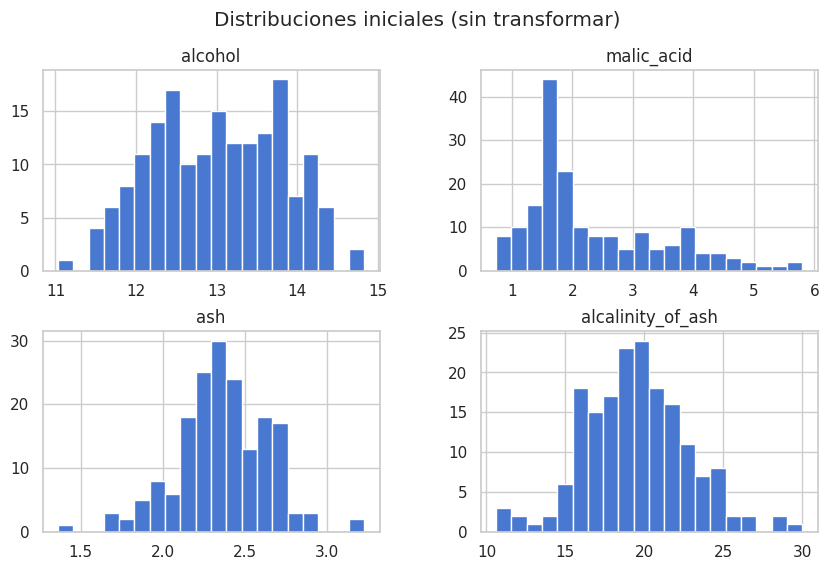

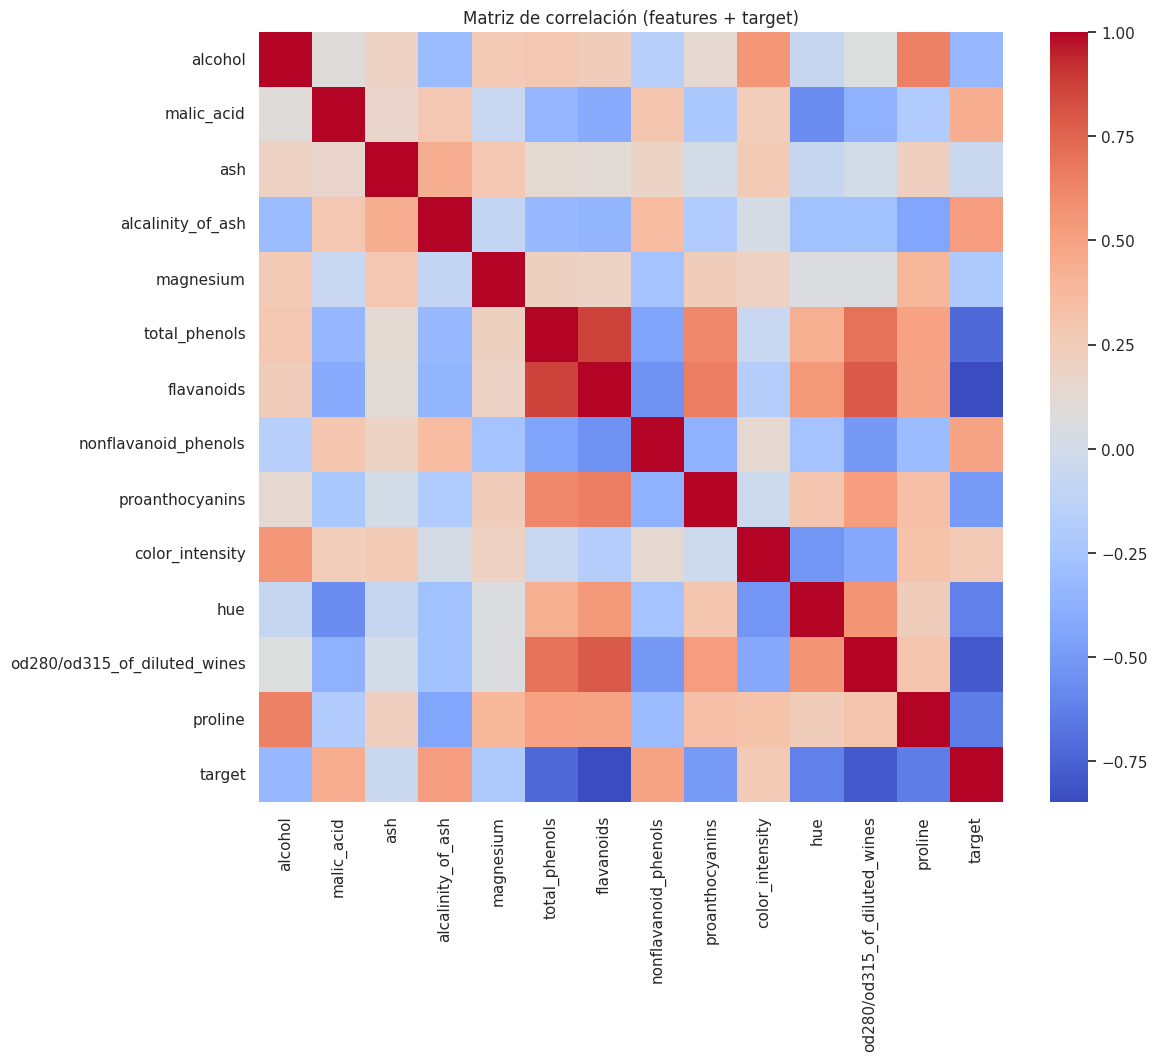

In [ ]:
cols_plot = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
df[cols_plot].hist(bins=20, figsize=(10,6), layout=(2,2))
plt.suptitle('Distribuciones iniciales (sin transformar)')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de correlación (features + target)')
plt.show()

In [ ]:
def detect_outliers_iqr(df_in, features, k=1.5):
    out_idx = set()
    for col in features:
        Q1 = df_in[col].quantile(0.25)
        Q3 = df_in[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        ids = df_in[(df_in[col] < lower) | (df_in[col] > upper)].index
        out_idx.update(ids.tolist())
    return sorted(list(out_idx))

features = X.columns.tolist()
outliers_idx = detect_outliers_iqr(df, features, k=1.5)
print('Número de filas detectadas como outliers (IQR k=1.5):', len(outliers_idx))
print('Proporción del dataset:', round(len(outliers_idx)/len(df),4))


# hacer estudio de valores y caracteritcias

Número de filas detectadas como outliers (IQR k=1.5): 17
Proporción del dataset: 0.0955


In [ ]:
df_no_out = df.drop(index=outliers_idx).reset_index(drop=True)
X_no_out = df_no_out.drop('target', axis=1)
y_no_out = df_no_out['target']
print('Shape original:', df.shape, 'Shape sin outliers:', df_no_out.shape)

In [ ]:
skewness = X.skew().sort_values(ascending=False)
skewness.head(10)

,0
magnesium,1.098191
malic_acid,1.039651
color_intensity,0.868585
proline,0.767822
proanthocyanins,0.517137
nonflavanoid_phenols,0.450151
alcalinity_of_ash,0.213047
total_phenols,0.086639
flavanoids,0.025344
hue,0.021091


In [ ]:
cols_log = skewness[abs(skewness) > 1.0].index.tolist()
cols_log

X_log = X.copy()
for c in cols_log:
    X_log[c] = np.log1p(X_log[c])

pt = PowerTransformer(method='yeo-johnson')
X_pt = pd.DataFrame(pt.fit_transform(X), columns=X.columns)

# Mostrar comparación de skew antes/después
print('Skew original (top 10):')
print(X.skew().sort_values(ascending=False).head(10))
print('\nSkew after log1p (top 10):')
print(X_log.skew().sort_values(ascending=False).head(10))
print('\nSkew after PowerTransformer (top 10):')
print(X_pt.skew().sort_values(ascending=False).head(10))

Skew original (top 10):
magnesium               1.098191
malic_acid              1.039651
color_intensity         0.868585
proline                 0.767822
proanthocyanins         0.517137
nonflavanoid_phenols    0.450151
alcalinity_of_ash       0.213047
total_phenols           0.086639
flavanoids              0.025344
hue                     0.021091
dtype: float64

Skew after log1p (top 10):
color_intensity         0.868585
proline                 0.767822
magnesium               0.605723
malic_acid              0.529222
proanthocyanins         0.517137
nonflavanoid_phenols    0.450151
alcalinity_of_ash       0.213047
total_phenols           0.086639
flavanoids              0.025344
hue                     0.021091
dtype: float64

Skew after PowerTransformer (top 10):
malic_acid              0.073007
ash                     0.043206
nonflavanoid_phenols    0.039691
alcalinity_of_ash       0.016507
proline                 0.012218
color_intensity         0.009866
magnesium            

In [ ]:
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

scaled_examples = {}
for name, scaler in scalers.items():
    scaled = pd.DataFrame(scaler.fit_transform(X_log), columns=X.columns)
    scaled_examples[name] = scaled
    print(name, '-> mean mean:', np.round(scaled.mean().mean(),4), 'std mean:', np.round(scaled.std().mean(),4))


standard -> mean mean: 0.0 std mean: 1.0028
minmax -> mean mean: 0.4248 std mean: 0.2025
robust -> mean mean: 0.0329 std mean: 0.6925


In [ ]:
df_bal = df.copy()
df0 = df_bal[df_bal['target']==0]
df1 = df_bal[df_bal['target']==1].sample(frac=0.25, random_state=42)
df2 = df_bal[df_bal['target']==2].sample(frac=0.25, random_state=42)
df_imbal = pd.concat([df0, df1, df2]).reset_index(drop=True)
print('Distribución original:')
print(df['target'].value_counts())
print('\nDistribución desbalanceada (artificial):')
print(df_imbal['target'].value_counts())


Distribución original:
target
1    71
0    59
2    48
Name: count, dtype: int64

Distribución desbalanceada (artificial):
target
0    59
1    18
2    12
Name: count, dtype: int64


In [ ]:
X_i = df_imbal.drop('target', axis=1)
y_i = df_imbal['target']

if has_imbalanced:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_i, y_i)
    print('\nTras SMOTE (oversampling):')
    print(pd.Series(y_res).value_counts())
else:
    print('\nSMOTE no está disponible en este entorno; omitiendo oversampling.')



Tras SMOTE (oversampling):
target
0    59
1    59
2    59
Name: count, dtype: int64


In [ ]:
def evaluate_classification(X, y, scaler, model, desc=''):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    pipe = Pipeline([('scaler', scaler), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(desc, type(scaler).__name__, type(model).__name__, '-> acc:', round(acc,4), 'f1_macro:', round(f1,4))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return pipe

# Probamos combinaciones sobre X_log (log transform) y X_pt (PowerTransformer)
experiments = []
for X_variant, name in [(X, 'original'), (X_log, 'log1p'), (X_pt, 'power')]:
    print('\n===== Experimento con:', name, '=====')
    for sname, scaler in scalers.items():
        for model in [LogisticRegression(max_iter=2000), RandomForestClassifier(n_estimators=200, random_state=42)]:
            desc = f'{name} - {sname}'
            pipe = evaluate_classification(X_variant, y, scaler, model, desc=desc)
            experiments.append((name, sname, model.__class__.__name__))



===== Experimento con: original =====
original - standard StandardScaler LogisticRegression -> acc: 0.9722 f1_macro: 0.971
Confusion matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

original - standard StandardScaler RandomForestClassifier -> acc: 1.0 f1_macro: 1.0
Confusion matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      